<a href="https://colab.research.google.com/github/YujiSue/Lecture/blob/master/2020/Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#画像を開く


In [0]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg -O MonaLisa.jpg
!wget https://publicdomainq.net/images/201804/03s/publicdomainq-0020622ihu.jpg -O lulutima.jpg
!wget http://livedoor.blogimg.jp/mement_mori_6/imgs/a/c/ac18f0c0.jpg -O last.jpg
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
!wget https://raw.githubusercontent.com/opencv/opencv/2.4/data/haarcascades/haarcascade_mcs_eyepair_small.xml
!wget https://raw.githubusercontent.com/opencv/opencv/2.4/data/haarcascades/haarcascade_mcs_lefteye.xml
!wget https://raw.githubusercontent.com/opencv/opencv/2.4/data/haarcascades/haarcascade_mcs_righteye.xml
!wget https://raw.githubusercontent.com/opencv/opencv/2.4/data/haarcascades/haarcascade_mcs_mouth.xml
!wget https://raw.githubusercontent.com/opencv/opencv/2.4/data/haarcascades/haarcascade_mcs_nose.xml

--2019-10-26 02:20:13--  https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333010 (325K) [image/jpeg]
Saving to: ‘MonaLisa.jpg’

MonaLisa.jpg        100%[===================>] 325.21K  --.-KB/s    in 0.02s   

2019-10-26 02:20:13 (14.7 MB/s) - ‘MonaLisa.jpg’ saved [333010/333010]

--2019-10-26 02:20:16--  https://publicdomainq.net/images/201804/03s/publicdomainq-0020622ihu.jpg
Resolving publicdomainq.net (publicdomainq.net)... 183.90.255.2
Connecting to publicdomainq.net (publicdomainq.net)|183.90.255.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103203 (101K) [image/jpeg]
Saving to: 

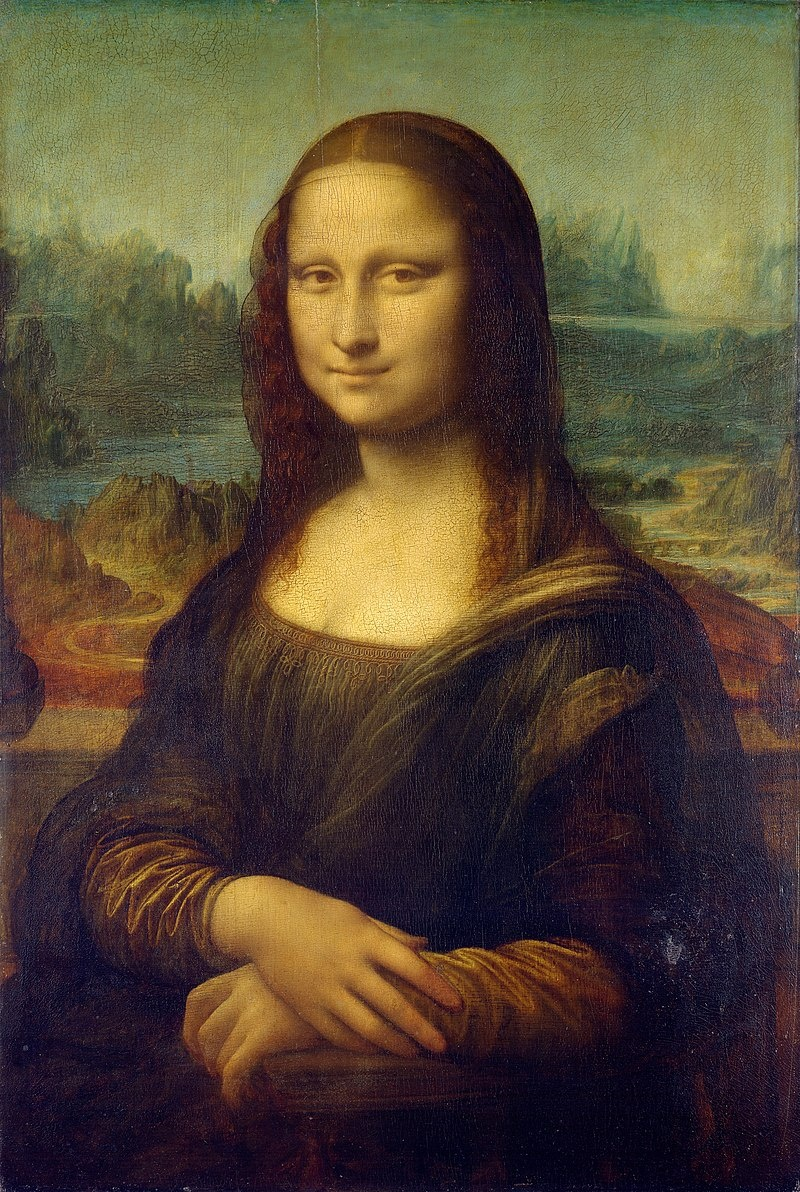

In [0]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, Image, clear_output

def showCVImage(mat):
  decoded_bytes = cv2.imencode('.jpg', mat)[1].tobytes()
  display(Image(data=decoded_bytes))

img = cv2.imread('/content/MonaLisa.jpg')
showCVImage(img)

# セピア調に変える


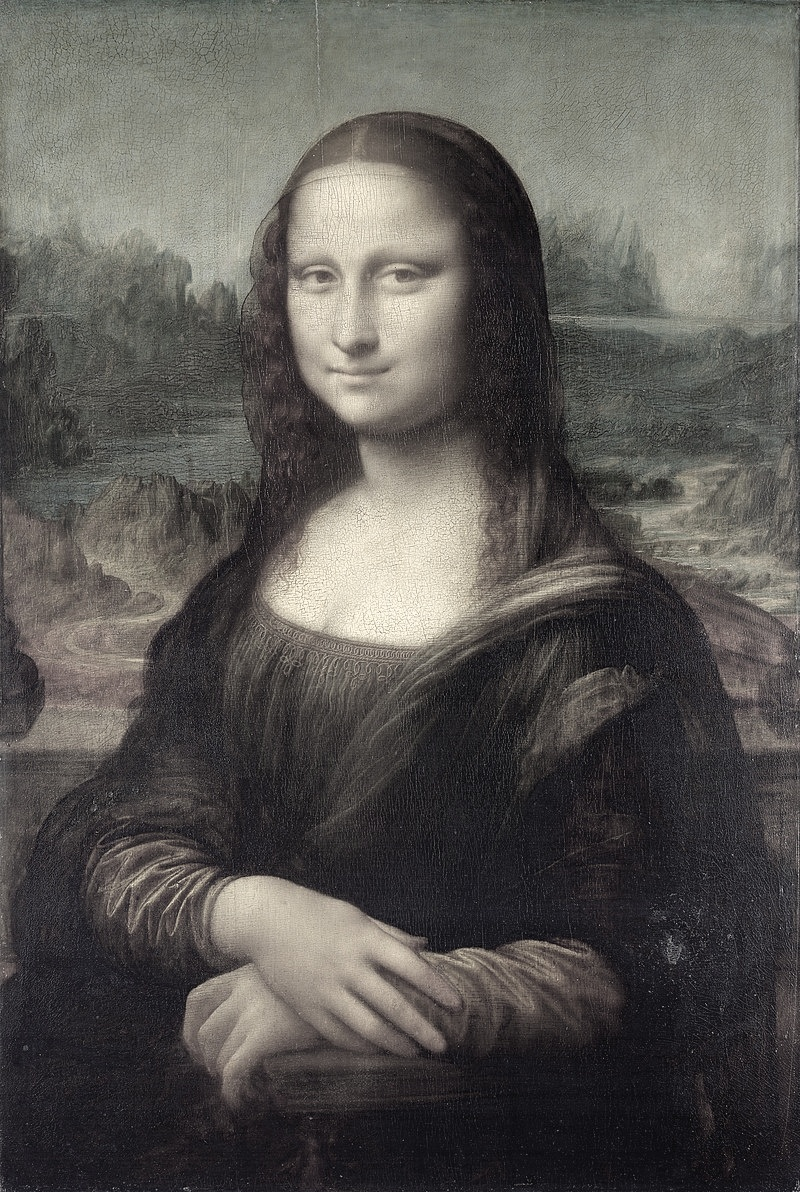

In [0]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # 色空間をBGRからHSVに変換
change = 0.2 #@param{type:"slider", min:0, max:1, step:0.1}

s_magnification = 0.2  # 彩度(Saturation)の倍率

img_hsv[:,:,(1)] = img_hsv[:,:,(1)]*change  # 彩度の計算
img_converted = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR)  # 色空間をHSVからBGRに変換
showCVImage(img_converted)

# 特徴抽出


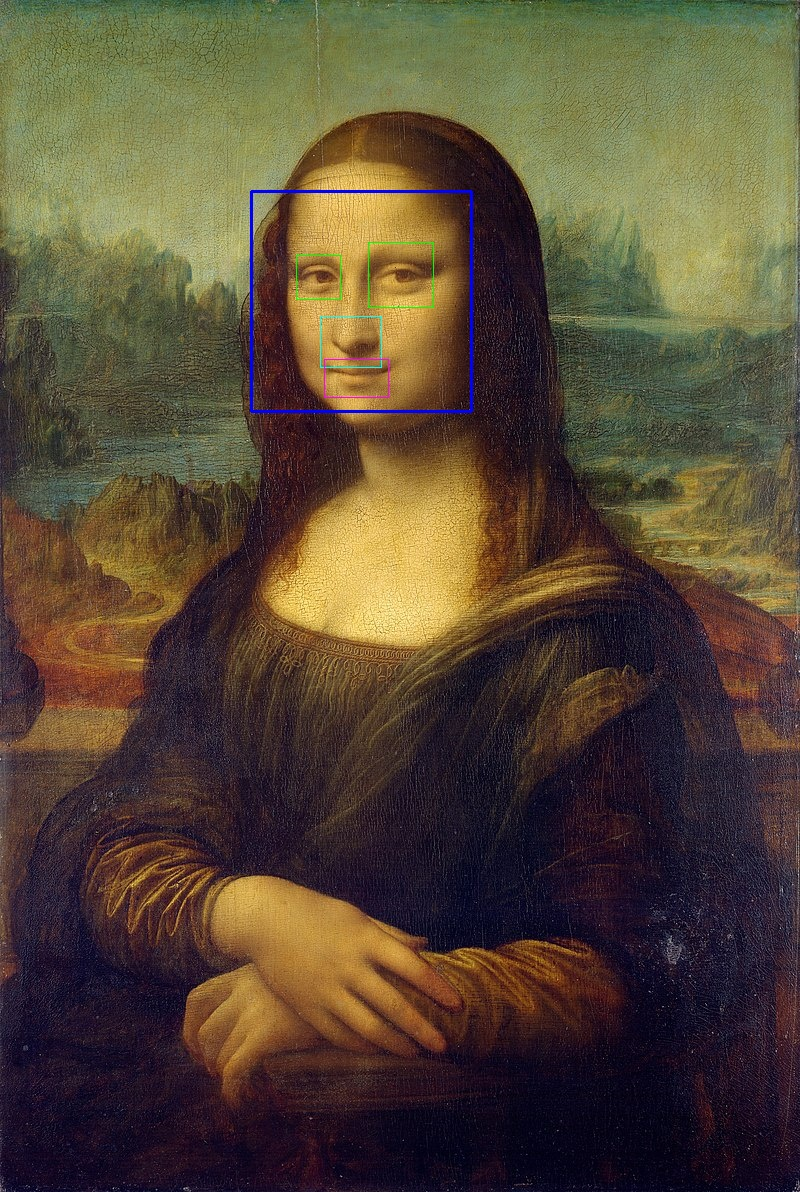

In [0]:
# Haar-like特徴分類器の読み込み
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('/content/haarcascade_mcs_eyepair_small.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
leye_cascade = cv2.CascadeClassifier('/content/haarcascade_mcs_lefteye.xml')
reye_cascade = cv2.CascadeClassifier('/content/haarcascade_mcs_righteye.xml')
nose_cascade = cv2.CascadeClassifier('/content/haarcascade_mcs_nose.xml')
mouth_cascade = cv2.CascadeClassifier('/content/haarcascade_mcs_mouth.xml')
#
# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dis = cv2.imread('/content/MonaLisa.jpg')
#showCVImage(dis)

# 顔を検知
faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    # 検知した顔を矩形で囲む
    cv2.rectangle(dis,(x,y),(x+w,y+h),(255,0,0),2)
    # 顔画像（グレースケール）
    roi_gray = gray[y:y+h, x:x+w]
    # 顔画像（カラースケール）
    roi_color = dis[y:y+h, x:x+w]
    # 顔の中から目を検知
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.07, minNeighbors=1)
    true_eyes = []
    for (ex,ey,ew,eh) in eyes:
        # 検知した目を矩形で囲む
        true_eyes.append([ex,ey,ew,eh])
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        #IPython.display.clear_output()
        #showCVImage(dis)
    #print(true_eyes)
    true_eye_pos = true_eyes[0]
    nose_pos = []
    nose = nose_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in nose:
      if ey > true_eye_pos[1]+true_eye_pos[3]:
        nose_pos.append([ex,ey,ew,eh])
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),1)
        
    mouth = mouth_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in mouth:
      if ey+eh > nose_pos[0][1]+nose_pos[0][3]:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,255),1)
        
        
showCVImage(dis)


# 画像診断


In [0]:
!wget https://app.box.com/s/liaupg1wfu6zo6li97k2mdpmzyp7b2fw -O normal1.png
!wget https://app.box.com/s/1a2mubls5pym5tar2azznl7sf36qg5n0 -O normal2.png
!wget https://app.box.com/s/7cy5okn40ig1zb64ifh1lj07m6rq01gv -O normal3.png
!wget https://app.box.com/s/y2uqth21lb6lolbjulw0rfhze3e2l1hn -O vardio1.png
!wget https://app.box.com/s/5r7dk8u8hejdhqorxsdxosv80z8i739f -O cardio2.png
!wget https://app.box.com/s/g76m6lr82xnyoa0k70y0y4pata7q7dq7 -O cardio3.png
!wget http://www.twmu.ac.jp/IOG/column/img/column32_2.jpg -O comp.jpg

--2019-10-26 02:21:31--  https://app.box.com/s/liaupg1wfu6zo6li97k2mdpmzyp7b2fw
Resolving app.box.com (app.box.com)... 185.235.236.198
Connecting to app.box.com (app.box.com)|185.235.236.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘normal1.png’

normal1.png             [  <=>               ]   7.45K  32.9KB/s    in 0.2s    

2019-10-26 02:21:31 (32.9 KB/s) - ‘normal1.png’ saved [7629]

--2019-10-26 02:21:34--  https://app.box.com/s/1a2mubls5pym5tar2azznl7sf36qg5n0
Resolving app.box.com (app.box.com)... 185.235.236.198
Connecting to app.box.com (app.box.com)|185.235.236.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘normal2.png’

normal2.png             [  <=>               ]   7.45K  27.8KB/s    in 0.3s    

2019-10-26 02:21:34 (27.8 KB/s) - ‘normal2.png’ saved [7629]

--2019-10-26 02:21:36--  https://app.box.com/s/7cy5okn40ig1zb64ifh1lj07m6rq01gv
Reso

## 心臓の肥大
正面から撮った胸部レントゲンで、胸郭と心臓の幅を比較します（心胸郭比）。  
このとき心臓の幅が50％以上あると心拡大とされます。  
![代替テキスト](http://www.twmu.ac.jp/IOG/column/img/column32_2.jpg)  
from http://www.twmu.ac.jp/IOG

## 試しに判定してみる
アメリカ国立衛生研究所（National Institutes of Health、NIH）が様々な胸部Ｘ線画像を公開しています。  
https://nihcc.app.box.com/v/ChestXray-NIHCC/folder/36938765345  
この中から健常者、心拡大の画像を試しに取ってきて判定してみましょう。

# CNNによる学習

In [0]:
import chainer
import chainer.functions as F
import chainer.links as L

class AlexNet(chainer.Chain):
    def __init__(self, num_class, train=True):
        super(AlexNet, self).__init__()
        with self.init_scope():
            self.conv1=L.Convolution2D(None, 96, 11, stride=2)
            self.conv2=L.Convolution2D(None, 256, 5, pad=2)
            self.conv3=L.Convolution2D(None, 384, 3, pad=1)
            self.conv4=L.Convolution2D(None, 384, 3, pad=1)
            self.conv5=L.Convolution2D(None, 256, 3, pad=1)
            self.fc6=L.Linear(None, 4096)
            self.fc7=L.Linear(None, 4096)
            self.fc8=L.Linear(None, num_class)

    def __call__(self, x):
        h = F.max_pooling_2d(F.local_response_normalization(
            F.relu(self.conv1(x))), 3, stride=2)
        h = F.max_pooling_2d(F.local_response_normalization(
            F.relu(self.conv2(h))), 3, stride=2)
        h = F.relu(self.conv3(h))
        h = F.relu(self.conv4(h))
        h = F.max_pooling_2d(F.relu(self.conv5(h)), 3, stride=2)
        h = F.dropout(F.relu(self.fc6(h)))
        h = F.dropout(F.relu(self.fc7(h)))
        h = self.fc8(h)

        return h